HSE, DBA projects,

Building Forecastability Index

<font color="green"> Launch code </font>

<span style="color:black; font-size: 12pt"></span>

Name Surname,
<font color="blue">group </font>

**Key words:**
    - Time Series Segmentation, Intermittency Test, Seasonality Test, ABC-classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

# don't forget to upload utils file to the colab session
import warnings

warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
pd.options.plotting.backend = "plotly"

import warnings
warnings.filterwarnings('ignore')

# # setting of the plotting style, registers pandas date converters for matplotlib and the default figure size
# import seaborn as sns
# sns.set_style("darkgrid")
# pd.plotting.register_matplotlib_converters()
# # Default figure size
# sns.mpl.rc("figure", figsize=(25, 5))
# sns.mpl.rc("font", size=14)

# I. Building Time Series Forecastability Index
Those Time Series that have about the same accuracy level should have the same $\color{red}{Forecastability~Index}$.



<img src = 'https://github.com/aromanenko/ATSF/blob/main/pic/Forecastability%20Index.png?raw=true' width = 500pt>

Forecastability index = Function_of_DemandPatterns(Velocity, Variability, Trend, Seasonality, Intermittency) x Horizon

If there is a set of time series, forecastablity index may be presented as table with columns


|FI| No of ts| Demand share|  


Goal of the project: build forecastablity index for particular set

https://www.kaggle.com/t/216ccba5311a44d8a6a8998534523cf7

## Steps to build FI
### 1. Generate segments for each attributes
 - 1.1. Demand Volume (3-groups) - see II.1 and II.2 below
 - 1.2. Demand Variability (volatility coefficient) (3 groups) see II.1 and II. 3 below
 - 1.3. Seasonality (0/1) see https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_segmentation.py
 - 1.4. Trend (0/1) see https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_segmentation.py
 - 1.5. Intermittency (0/1) https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_segmentation.py

### 2. Define benchmark forecastability for eash 5-dim cell from 1
 - 2.1. Use naive forecast to generate forecast for each ts,  see https://github.com/aromanenko/ts-segmentation/blob/main/timeseries_forecasting.py
 - 2.2. Calculate WAPE metic for each 5-dim cell, see https://github.com/aromanenko/ATSF/blob/main/7_Loss%20Functions%20in%20Forecasting.ipynb
 - 2.3. Order all 5-dim cells on WAPE metric (see example below)

### 3. Aggregate 5-dim cells to clusters with similar forecastability
 - use abc-analysis, see II.1 below

In [ ]:
# example of 2.3 step
import itertools

## cortesian product of all segments
fi_segments = [
   [1, 100, 1000],
   [0.1, 0.8, 2],
   [0, 1],
   [0, 1],
   [0, 1]
   ]

# table with all fi cells
fi_cells = pd.DataFrame([element for element in itertools.product(*fi_segments)], columns = ['Demand Volume', 'Demand Variability', 'Seasonality', 'Trend', 'Intermittency'])
fi_cells['WAPE'] = [np.random.random() for i in fi_cells.index] # fake WAPE generation, just for example, you have to calculate real WAPE at 2.2. step
fi_cells['WAPE_ci_l'] = fi_cells['WAPE']-0.1  # fake WAPE lower-ci generation, just for example, you have to calculate real WAPE ci at 2.2. step
fi_cells['WAPE_ci_u'] = fi_cells['WAPE']+0.1  # fake WAPE upper_ci generation, just for example, you have to calculate real WAPE ci at 2.2. step
fi_cells = fi_cells.sort_values(by = 'WAPE')

# draw CI plot example
x = tuple(range(0,fi_cells.shape[0]))
y = tuple(fi_cells.WAPE_ci_u.values)+tuple(fi_cells.WAPE_ci_l.values[::-1]) # upper, then lower reversed


# some plotly hints to make picture readable
fig = go.Figure([
    go.Scatter(
        x=x,
        y=fi_cells.WAPE,
        line=dict(color='rgb(0,100,80)'),
        mode='lines',
        text=['Demand volume {0}<br>Demand variable {1}<br>Seasonality {2}<br>Trend {3}<br>Intermittency {4}'.\
              format(x[1]['Demand Volume'], x[1]['Demand Variability'], x[1]['Seasonality'], x[1]['Trend'], x[1]['Intermittency'])
              for x in fi_cells.iterrows()],
        name='WAPE',
    ),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y ,
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=True,
        text=fi_cells['Demand Volume'],
        name = 'WAPE_ci'
    )
])
fig.update_layout(
    title=dict(
        text="Foreastability Index plot"
    ),
    xaxis=dict(
        title=dict(
            text="5-dim cell"
        )
    ),
    yaxis=dict(
        title=dict(
            text="WAPE"
        )
    ))

fig.show()

# II. Some theory

## 1. ABC analysis

In [ ]:
!pip install abc_analysis

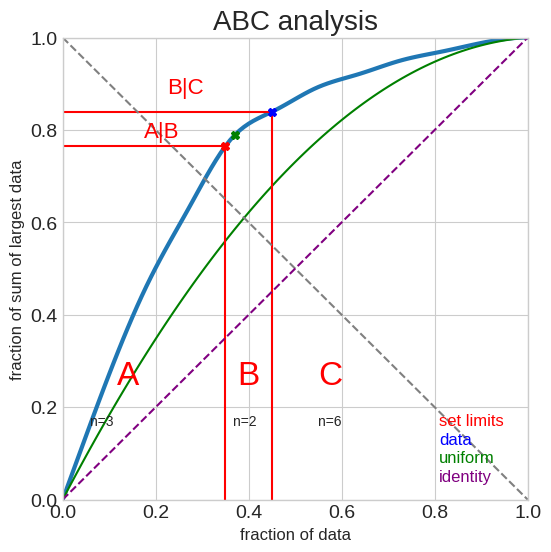

In [ ]:
import abc_analysis
from abc_analysis import abc_analysis, abc_plot

# Perform an ABC analysis with plotting
dctAnalysis = abc_analysis([1, 15, 25, 17, 2, 3, 5, 6, 2, 3, 22], True)

## 2. Demand Volume segments (example)

In [ ]:
# ts_retail = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/retail_2products.csv', sep=';')
# ts_retail['Date'] = pd.to_datetime(ts_retail['Date'], dayfirst = True)
# ts_retail.set_index(['Date'], inplace=True)

ts_id_columns = ['Store_id', 'SKU_id']
# ts_retail.head()

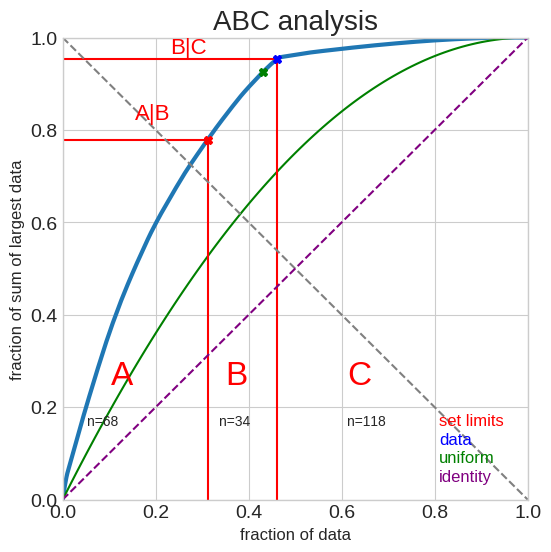

In [ ]:
# split TS by Demand Volume
ts_mean_values = ts_retail.groupby(ts_id_columns)['Demand'].mean()

# Plot saved results of an ABC analysis
ts_demand_abc  = abc_analysis(ts_mean_values.fillna(0), True)


## 3. Demand Variability Segments (example)

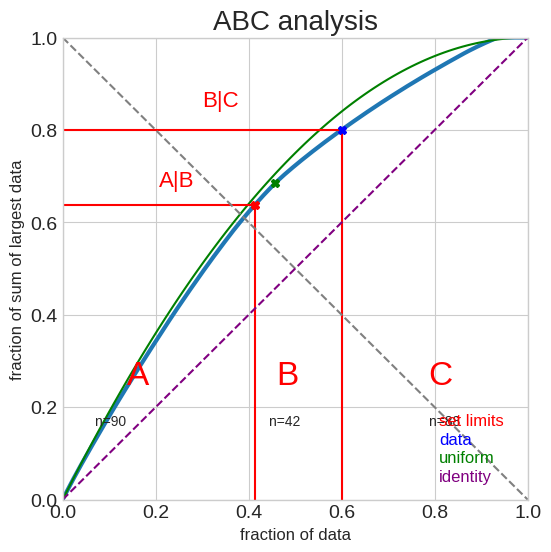

In [ ]:
# split TS by Coefficient of Volatility (CV)
ts_cv_values = ts_retail.groupby(ts_id_columns)['Demand'].std().fillna(0).div(ts_retail.groupby(ts_id_columns)['Demand'].mean().fillna(1))

# Plot saved results of an ABC analysis
ts_demand_abc  = abc_analysis(ts_cv_values.fillna(0), True)

## 4. Intermittent Demand Time Series model

$$ y_t = x_t\cdot z_t +\varepsilon_t$$

   - $x_t$ - random variable (1 or 0) to have non-zero actual value       
   - $z_t$ - actual volume


**Note:**
 - sometimes intermittent time series are classified to more classes https://frepple.com/blog/demand-classification/
 - don't confuse intermittent and highly-causal driven time series:
     -- we don't know time

### Croston Model
<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/CrostonIdea.PNG?raw=true">

**Croston Algorithm for Time Series Forecasting**

$$ \hat{y}_{t+1}=\hat z_t/\hat{n}_t$$
where
$$ \hat z_t = \begin{cases}z_{t-1}, & y_t==0 \\ \alpha\cdot{y_t}+(1-\alpha) z_{t-1}, & y_t <>0 \end{cases}$$

$$ \hat{n}_t = \begin{cases}\hat{n}_t, & y_t==0 \\ \beta\cdot{\color{red}{n_t}}+(1-\beta) \hat{n}_{t-1}, & y_t <>0 \end{cases}$$

$\alpha$ - smoothing parameter for time level value
$\beta$ - smoothing parameter for 0-intervals length forecasting

<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/CrostonIdea2.PNG?raw=true">


**Example of Realization**
- https://towardsdatascience.com/croston-forecast-model-for-intermittent-demand-360287a17f5f

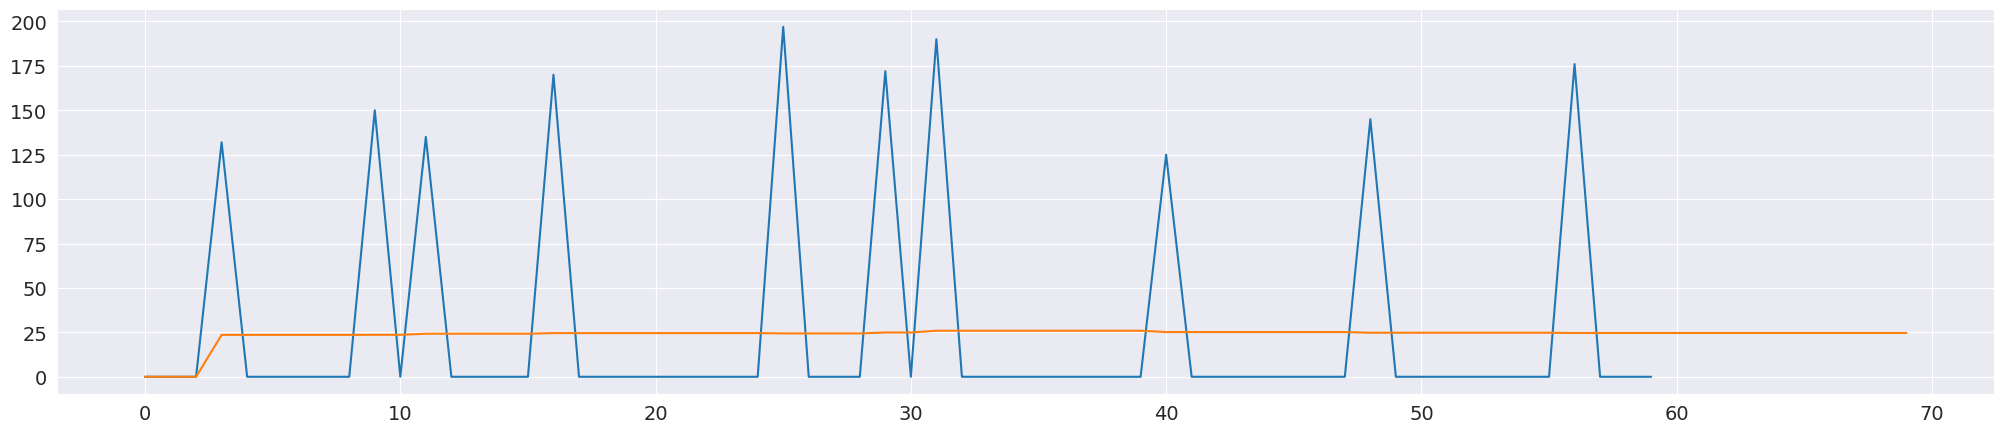

In [ ]:
!pip install croston
from croston import croston
import random

a = np.zeros(50)
val = np.array(random.sample(range(100,200), 10))
idxs = random.sample(range(50), 10)

ts = np.insert(a, idxs, val)

fit_pred = croston.fit_croston(ts, 10,'original')

yhat = np.concatenate([fit_pred['croston_fittedvalues'], fit_pred['croston_forecast']])

plt.plot(ts)
plt.plot(yhat)


Times Series with intermittent-demand-pattern contains non-zero actual values in random time points (non-zero actual values occur occasionaly).


<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/IntermittentExample.PNG?raw=true">
<img src = "https://github.com/aromanenko/ATSF/blob/main/pic/IntermittentExample2.PNG?raw=true">